# 생능출판사 
## 수학, 통계를 몰라도 이해할 수 있는 쉬운 딥러닝


# 구글 드라이브 연결
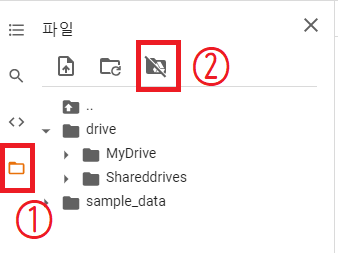

순서대로 실행하기

# Colab에서 matplotlib 실행시 한글 안나오는 문제 해결 방법
다음을 실행시킨뒤, 런타임 -> 런타임 다시시작 누르기

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


다음을 실행하여 테스트 해보기

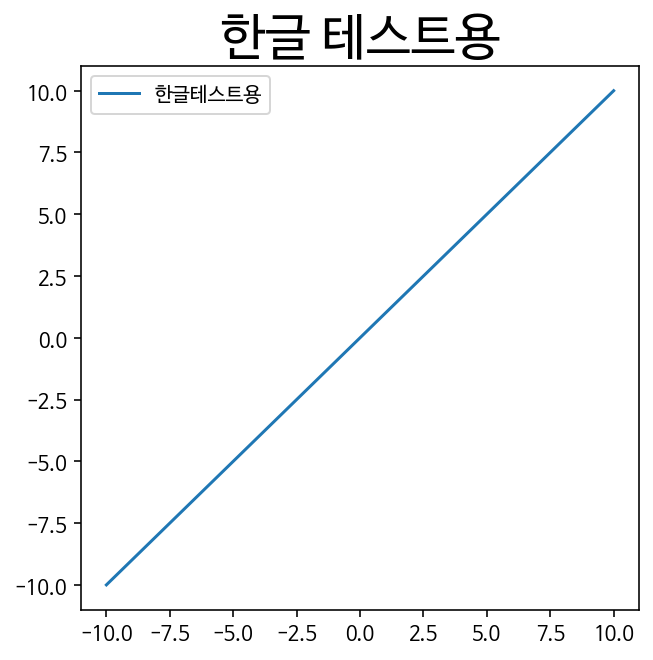

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([-10,10], [-10,10], label='한글테스트용')
plt.title("한글 테스트용", size = 25)
plt.legend()
plt.show()

# 원하는 경로로 들어가기

In [3]:
cd /content/drive/MyDrive/Colab Notebooks/easydeep

/content/drive/MyDrive/Colab Notebooks/easydeep


In [4]:
cd /content/drive/MyDrive/Colab Notebooks/easydeep/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[5장] 분류(Classification) 기법 활용하기/2_5_1_AI는 체격을 보고 초, 중, 고등학생을 구분할 수 있을까

/content/drive/MyDrive/Colab Notebooks/easydeep/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[5장] 분류(Classification) 기법 활용하기/2_5_1_AI는 체격을 보고 초, 중, 고등학생을 구분할 수 있을까


# 실제 딥러닝 시작

In [5]:
from tensorflow import keras
import data_reader

In [6]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

In [7]:
# 데이터를 읽어옵니다.
dr = data_reader.DataReader()



Data Read Done!
Training X Size : (7745, 3)
Training Y Size : (7745,)
Test X Size : (1937, 3)
Test Y Size : (1937,)




In [8]:
# 불러온 데이터 확인해보기
import pandas as pd

files = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/easydeep/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[5장] 분류(Classification) 기법 활용하기/2_5_1_AI는 체격을 보고 초, 중, 고등학생을 구분할 수 있을까/data/datas.csv", encoding="cp949")
files.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,남여공학,3,7,남,20150511,172.1,60.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,남여공학,3,3,남,20150415,139.7,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,남여공학,3,1,남,20150520,179.0,78.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,4,1,남,20150421,137.0,29.2,NaN,NaN,NaN,NaN,NaN,NaN,91.0,63.0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,남여공학,2,1,남,20150423,154.9,53.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

In [10]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", metrics=["accuracy"],
              loss="sparse_categorical_crossentropy")

In [11]:
# 인공신경망을 학습시킵니다.
print("************ TRAINING START ************")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

************ TRAINING START ************
Epoch 1/20
243/243 [==============================] - 1s 3ms/step - loss: 1.0578 - accuracy: 0.4822 - val_loss: 0.8888 - val_accuracy: 0.6897
Epoch 2/20
243/243 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.6645 - val_loss: 0.7108 - val_accuracy: 0.6918
Epoch 3/20
243/243 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.6870 - val_loss: 0.6601 - val_accuracy: 0.7073
Epoch 4/20
243/243 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6935 - val_loss: 0.6413 - val_accuracy: 0.7052
Epoch 5/20
243/243 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6864 - val_loss: 0.6381 - val_accuracy: 0.7068
Epoch 6/20
243/243 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6799 - val_loss: 0.6248 - val_accuracy: 0.7031
Epoch 7/20
243/243 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.7008 - val_l

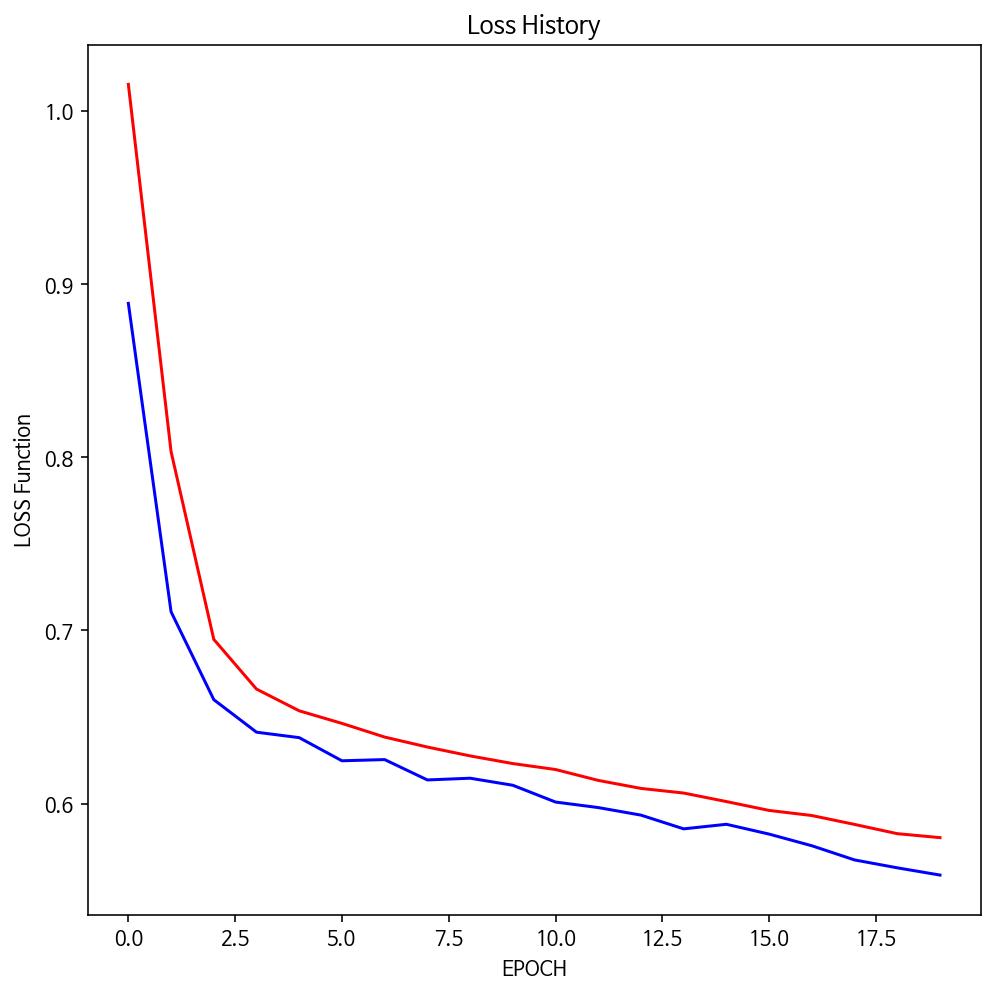

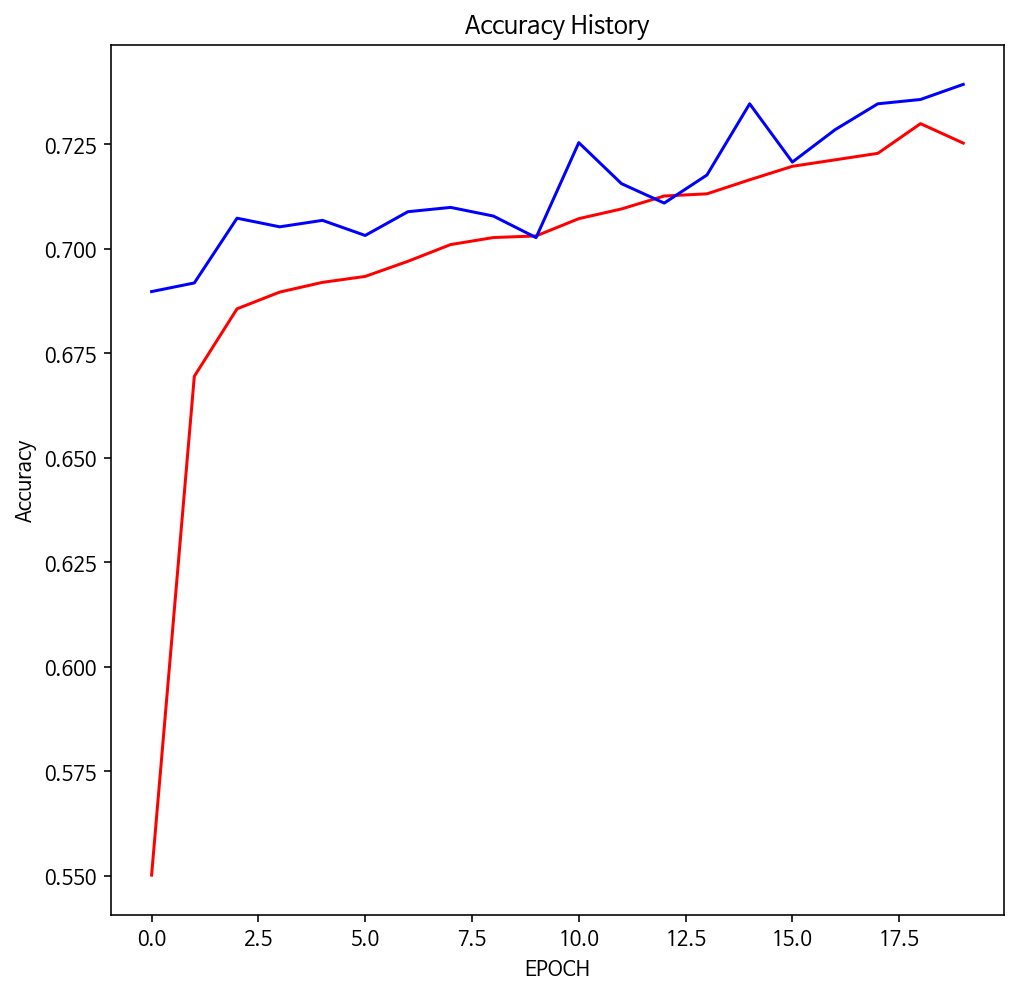

In [12]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history)

In [14]:
import numpy as np

sex = float(input("성별을 입력해주세요 남:1 여:0 : "))
height = float(input("키를 입력해 주세요 : ")) / 194.2
weight = float(input("체중을 입력해 주세요 : ")) / 130.7

data = []
data.append(height)
data.append(weight)
data.append(sex)

data = np.reshape(data,(1,3))
data = np.asarray(data)
guess = model.predict(data)

print("==================================")
print("초등학생일 확률 : ",guess[0][0]*100)
print("중학생일 확률 : ",guess[0][1]*100)
print("고등학생일 확률 : ",guess[0][2]*100)

성별을 입력해주세요 남:1 여:0 : 0
키를 입력해 주세요 : 176.5
체중을 입력해 주세요 : 53.2
초등학생일 확률 :  1.4404603280127048
중학생일 확률 :  28.94069254398346
고등학생일 확률 :  69.61883902549744


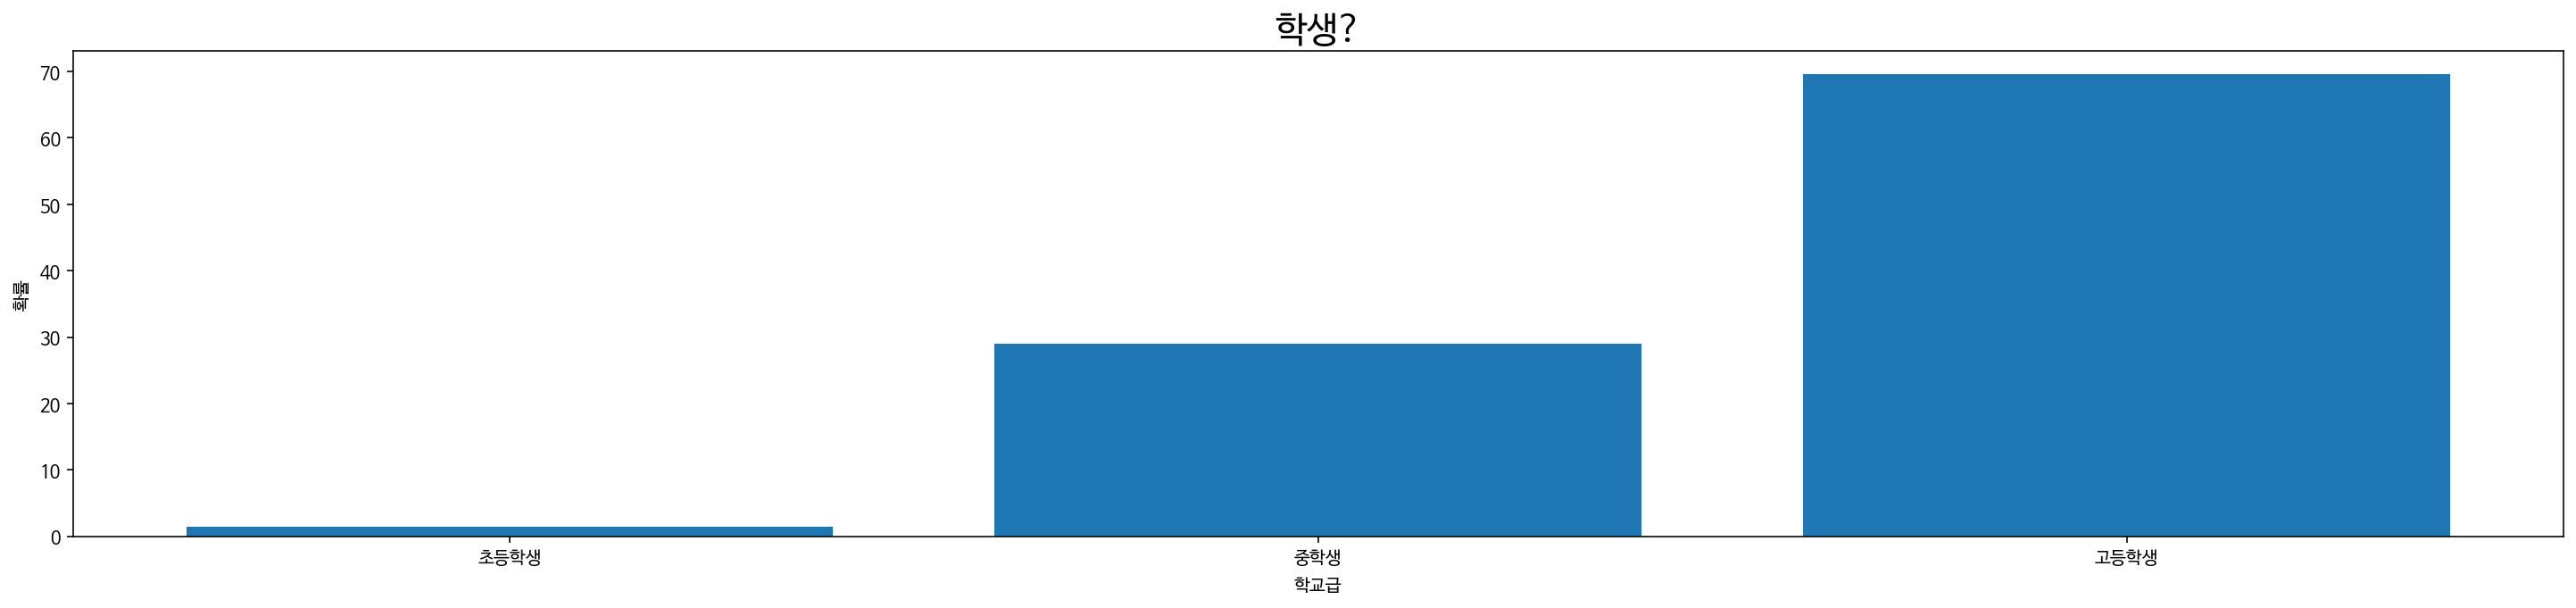

In [22]:
grade = []
grade.append(guess[0][0]*100)
grade.append(guess[0][1]*100)
grade.append(guess[0][2]*100)

## 데이터
category = ['초등학생', '중학생', '고등학생'] ## 연령 카테고리, x축 눈금에 표시될 라벨
 
## 시각화
plt.figure(figsize=(25,5)) ## Figure 생성 사이즈는 (가로,세로)
xtick_label_position = list(range(len(category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, category) ## x축 눈금 라벨 출력
 
## 바 차트 출력
plt.bar(xtick_label_position, grade)
 
plt.title('학생?',fontsize=20) ## 타이틀 출력
plt.xlabel('학교급') ## x축 라벨 출력
plt.ylabel('확률') ## y축 라벨 출력
plt.show()